In [31]:
#@title Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix

In [32]:
#@title Importing Data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# reading data
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

train.head()

/var/folders/27/m22rhg4555g1hc5_s5fzq38h0000gn/T/ipykernel_36850/3593941657.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/raw/train.csv')


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [33]:
#@title Target Count

train['drafted'].value_counts()

drafted
0.0    55555
1.0      536
Name: count, dtype: int64

In [34]:
#@title Missing Values

print(train.isna().sum())
print(test.isna().sum())

team                       0
conf                       0
GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
yr                       292
ht                        98
num                     4690
porpag                     0
adjoe                      0
pfr                        0
year                       0
type                       0
Rec_Rank               39055
ast_tov                 4190
rimmade       

In [35]:
#@title Fixing Height

# function to fix heights
def convert_height(height_str):
    if pd.isna(height_str) or height_str in ['-', 'None', 'So', 'Jr', 'Fr', '0']:
        return None
    elif height_str == 'Apr-00':
        return 4*12
    elif height_str == 'May-00':
        return 5*12
    elif height_str == 'Jun-00':
        return 6*12
    elif height_str == 'Jul-00':
        return 7*12
    elif "'" in height_str:
        feet, inches = height_str.split("'")
        return int(feet) * 12 + int(inches)
    elif '-' in height_str:
        try:
            inch, ft = height_str.split("-")
            if ft == 'Jun':
              return int(inch) + 6*12
            elif ft == 'Jul':
              return int(inch) + 7*12
            elif ft == 'May':
              return int(inch) + 5*12
            elif ft == 'Apr':
              return int(inch) + 4*12
        except ValueError:
            return height_str
    else:
        return height_str


train['ht'] = train['ht'].apply(convert_height)
test['ht'] = test['ht'].apply(convert_height)

In [36]:
#@title Undersampling and Dropping Unrequired Features

train2 = train[~train['pick'].isna()]

df = train2.drop(columns = ['type','player_id', 'num'], axis=1)

In [37]:
#@title Team Pick Ratio

# Calculate the total number of rows for each team
team_counts = train2['team'].value_counts()

# Calculate the total number of drafted players for each team
drafted_counts = train2[train2['drafted'] == 1]['team'].value_counts()

# Calculate the percentage of drafted players for each team
drafted_percentages = (drafted_counts / team_counts)

# Create a dictionary to map teams to their drafted percentages
team_percentage_mapping = drafted_percentages.to_dict()


In [38]:
def additional_features(df):
    df['team_pick_ratio'] = df['team'].map(team_percentage_mapping)
    df['team_pick_ratio'].fillna(0, inplace=True)

    # Scoring Efficiency Metrics
    df['pts_per_min'] = df['pts'] / df['mp']
    df['pts_created'] = df['pts'] + df['ast']
    df['second_chance_pts'] = df['pts'] + df['oreb']

    # Defensive Metrics
    df['disruptive_plays'] = df['blk'] + df['stl']
    df['total_stops'] = df['dreb'] + df['blk']

    # Shooting Performance Metrics
    df['total_fg_made'] = df['rimmade'] + df['midmade']
    df['total_fg_attempts'] = df['rimmade_rimmiss'] + df['midmade_midmiss']

    # Efficiency Ratios
    df['pts_per_min'] = df['pts'] / df['mp']
    df['ast_to_dreb_ratio'] = df['ast'] / df['dreb']

    # Composite Metrics
    df['defensive_performance'] = df['drtg'] + df['adrtg']
    df['overall_player_impact'] = df['obpm'] + df['dbpm']

    # Rebounding Metrics
    df['total_rebounds'] = df['oreb'] + df['dreb']
    df['total_extended_possessions'] = df['oreb'] + df['dreb'] + df['ast']

    # Performance Under Pressure
    df['pts_per_pick'] = df['pts'] / df['pick']

    # Draft Predictors
    df['potential_predictor'] = df['Rec_Rank'] * df['ast_tov']
    
    return df

In [39]:
# Stratified split
X = df.drop('drafted', axis=1)
y = df['drafted']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [40]:
df_test = test.copy()

In [50]:
categorical_cols = ['team', 'conf', 'yr']
numeric_cols = train2.drop('drafted', axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()

# Impute missing values with the most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = imputer_categorical.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = imputer_categorical.transform(X_test[categorical_cols])
df_test[categorical_cols] = imputer_categorical.transform(df_test[categorical_cols])

# Perform one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])
df_test_encoded = encoder.transform(df_test[categorical_cols])

# Impute missing values using KNN imputer
imputer_numeric = KNNImputer(n_neighbors=2)
X_train[numeric_cols] = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer_numeric.transform(X_test[numeric_cols])
df_test[numeric_cols] = imputer_numeric.transform(df_test[numeric_cols])


X_train = additional_features(X_train)
X_test = additional_features(X_test)
df_test = additional_features(df_test)

df_test.replace([np.inf, -np.inf], 0, inplace=True)
df_test.fillna(0, inplace=True)

all_numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[all_numeric_cols])
X_test_scaled = scaler.transform(X_test[all_numeric_cols])
df_test_scaled = scaler.transform(df_test[all_numeric_cols])


X_train_combined = np.concatenate([X_train_encoded, X_train_scaled], axis=1)
X_test_combined = np.concatenate([X_test_encoded, X_test_scaled], axis=1)
df_test_combined = np.concatenate([df_test_encoded, df_test_scaled], axis=1)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_combined, y_train)


/Users/rush/Library/Caches/pypoetry/virtualenvs/nba-draft-classification-SrAmCWHL-py3.9/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [51]:
def model_performance(model, X_test=X_test_combined, y_test=y_test):

  # Make predictions on the test data
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Calculate accuracy, auc, precision, recall
  accuracy = accuracy_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred_proba)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print("Accuracy:", accuracy)
  print("AUC:", auc)
  print("Precision:", precision)
  print("Recall:", recall)

  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix using Seaborn
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

Accuracy: 0.8345323741007195
AUC: 0.9140522875816993
Precision: 0.7924528301886793
Recall: 0.7777777777777778


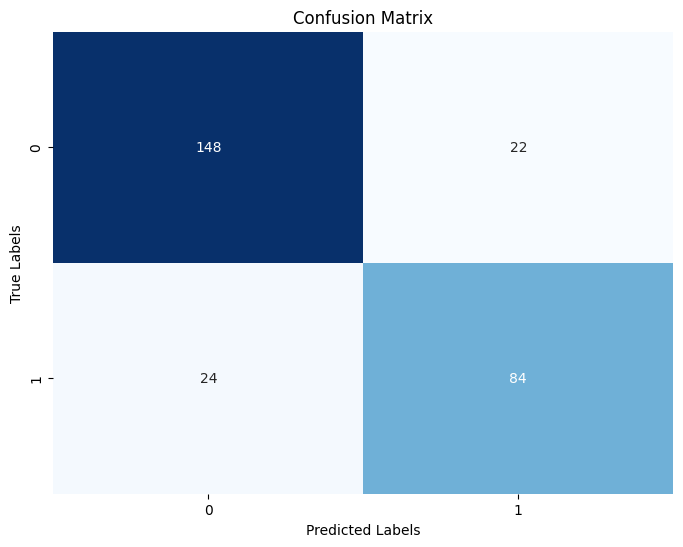

In [52]:
m_performance(model)

In [58]:
test['drafted'] = model.predict_proba(df_test_combined)[:, 1]
test['drafted'] = np.where(test['pick'].isna(), 0, test['drafted'])

In [60]:
test[['player_id', 'drafted']].to_csv('pred_0809.csv', index=False)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'wk4.pkl')